Zomato Data analysis project

Step:1- Importing Librarires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step-2 Create the data frame

In [2]:
df=pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


#Solving the Question

1). What type of restaurant do the majority of customers order from?
2). How many votes has each type of restaurant received from customers?
3). What are the ratings the the most couples order most of their food online. What is their average spending on each order?
4).Zomato has observed that most couples order most of their food online. What is their average spending on each order?
5). Which mode(online or offline) has  received the maximum rating?
6). Which type of restaurant received more offline orders, so that Zomato can customers with some good offers?



Convert the data type of column rate---

In [3]:
def handlerate(value):
    valur=str(value).split('/')
    value=value[0];
    return float(value)
df['rate']=df['rate'].apply(handlerate)    
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of Resturant

Text(0, 0.5, 'Ranges')

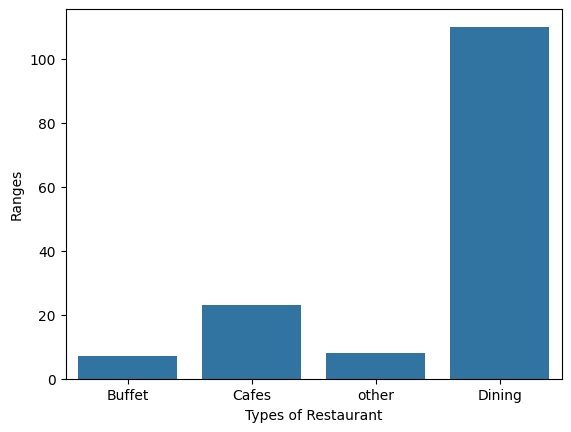

In [5]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Restaurant")
plt.ylabel("Ranges")

conclusion-majority of the restaurant falls in dinning category

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


In [7]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
grouped_data


listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64

Text(0, 0.5, 'votes')

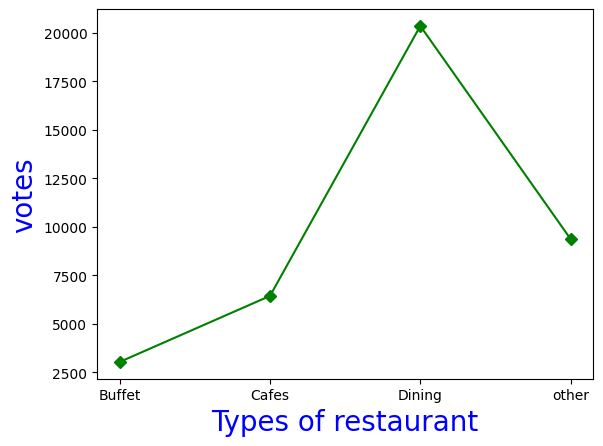

In [8]:
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='D')
plt.xlabel("Types of restaurant",c='blue',size=20)
plt.ylabel("votes",c="blue",size=20)

conclusion--- dinning restuarants has recieved maximum votes

In [9]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


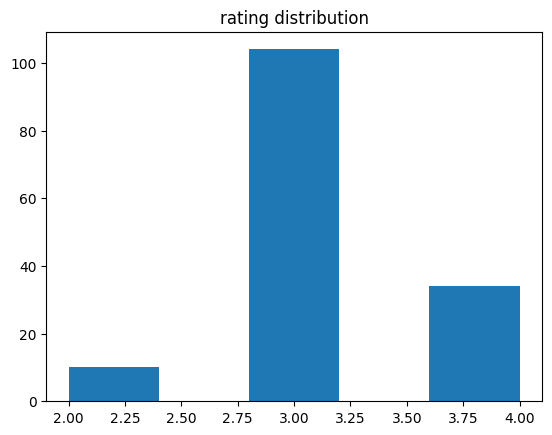

In [10]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()

colclusion-- the majority restaurants received rating  from 3.5 to 4

In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


Average Order spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

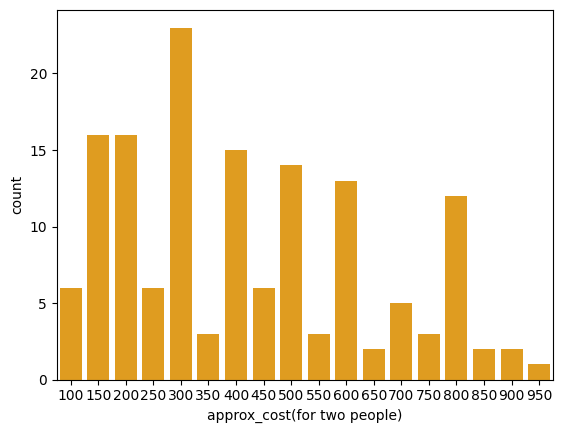

In [12]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data,color='orange')

Conclusion-- the majority of couples prefer restaurants with an approximate with an average of cost 300 rupees

Maximum rating received on which mode online or offline

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

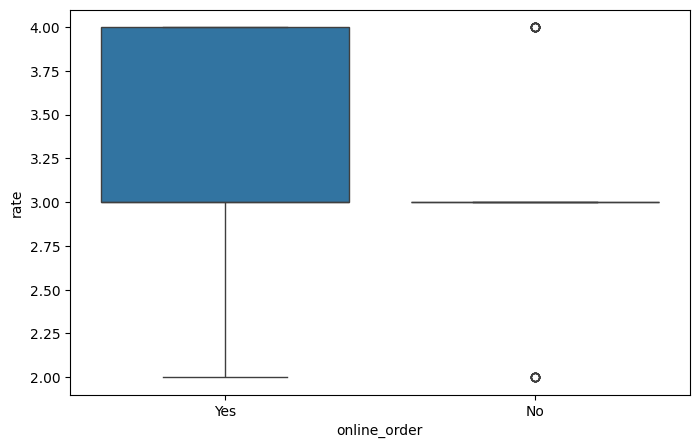

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x='online_order',y='rate',data=df)

Conclusion-- offline order received lower rating in comparison to online order

In [15]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


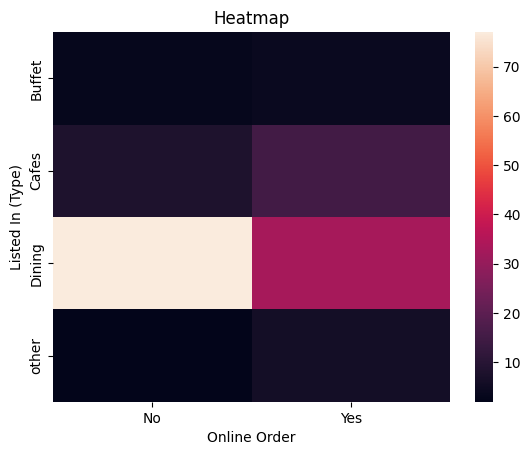

In [16]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,color='orange')#,annot=True,cmap="Y1GnBu",fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Conclusion-- Dining restaurants primarily accept offline orders, whereas cafes primarily online orders. This suggests that clients preference orders in person at restaurants, but prefer on line ordering at cafes.